In [12]:
from sympy import *

In [13]:
#general purpose code for interior cases

theta1=Symbol('\\theta_1')
theta2 =Symbol('\\theta_2')
lamb =Symbol('\lambda')
mu1 =Symbol('\mu_1')
mu2 =Symbol('\mu_2')

def profit(theta1,theta2, mu1, mu2, lamb):
    return ((3*lamb)+ mu2*theta2 - mu1*theta1)**2/(18*lamb)

def t(theta1, theta2, mu1, mu2, lamb):
    return (3*lamb + mu2*theta2 - mu1*theta1)/(6*lamb)

def outside():
    \mu_1*\theta_1*(\ell/2 - \mu_1*\theta_1/2)/\lambda

#analyze symmetric simultaneous case first
def nb_objective(theta1,theta2, mu1, mu2, lamb):
    term1 = (profit(theta1,theta2, mu1, mu2, lamb))
    term2 = ( mu2*theta2 + (mu1*theta1- mu2*theta2)*t(theta1, theta2, mu1, mu2,lamb))
    return term1*term2

In [14]:
print nb_objective(theta1,theta2, mu1, mu2, lamb)

(\mu_2*\theta_2 + (\mu_1*\theta_1 - \mu_2*\theta_2)*(3*\lambda - \mu_1*\theta_1 + \mu_2*\theta_2)/(6*\lambda))*(3*\lambda - \mu_1*\theta_1 + \mu_2*\theta_2)**2/(18*\lambda)


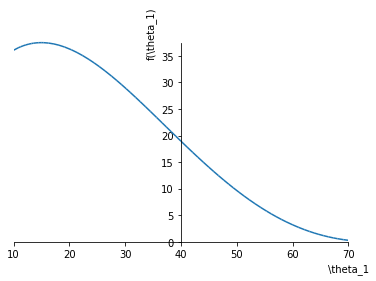

In [15]:
plot(nb_objective(theta1,1.5*10, .5, .5, 10), (theta1,10,70))

9*\lambda**2 + 3*\lambda*\mu_1*\theta_1 - 15*\lambda*\mu_2*\theta_2 + 4*\mu_1**2*\theta_1**2 - 8*\mu_1*\mu_2*\theta_1*\theta_2 + 4*\mu_2**2*\theta_2**2


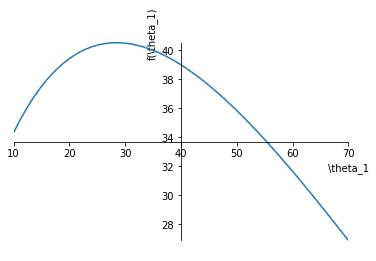

2673*\lambda**2 + 7200*\lambda*\mu_1*\theta_1 - 87*sqrt(3)*\lambda*sqrt(\lambda*(27*\lambda + 64*\mu_1*\theta_1)) + 2048*\mu_1**2*\theta_1**2 - 576*sqrt(3)*\mu_1*\theta_1*sqrt(\lambda*(27*\lambda + 64*\mu_1*\theta_1))
[-27*\lambda/(64*\mu_1), 15*\lambda/(2*\mu_1), 3*\lambda*(23/128 + 5*sqrt(57)/128)/\mu_1, 3*\lambda*(-5*sqrt(57)/128 + 23/128)/\mu_1]


In [16]:
#working out 2 stage solution

foc =  diff(nb_objective(theta2, theta1,  mu2, mu1, lamb), theta2)
foc2 = simplify(lamb**2*12*6*3*foc/((2*mu2*(3*lamb - mu2*theta2 + mu1*theta1) )))
print foc2
h =solve(foc2,theta2)[0]#.subs({mu1:.5,mu2:.5})
#print h
#print h.subs({mu1:.5,mu2:.5,theta1:(1.5*lamb)})
nbo1 = nb_objective(theta1, h, mu1, mu2, lamb)
plot(nbo1.subs({mu1:.5,mu2:.5,lamb:10}), (theta1,10,70))
foc1 = simplify(diff(nbo1,theta1)*(192*(27*lamb+64*mu1*theta1)/mu1))
print foc1
print simplify(solve(foc1,theta1))
#print simplify(lamb**2*12*6*3*foc).subs({mu1:.5, mu2:.5, theta2:theta1})

In [17]:
print solve(foc.subs({mu1:.5, mu2:.5, theta2:theta1}),theta1)

[1.5*\lambda]


In [18]:
mult_sol = simplify(solve(foc.subs({mu1:.5, mu2:.5}),theta1))
for sol in mult_sol:
    print simplify(nb_objective(sol,theta2, .5, .5, lamb))
    print '------'
    
#### only solution index 1 is the correct maximum....

\lambda*(-6.0*\lambda + 1.0*\theta_2)
------
0.56689453125*\lambda**2 - 0.2109375*\lambda*\theta_2 - 0.0583552274034436*\lambda*sqrt(\lambda*(-45.0*\lambda + 32.0*\theta_2)) + 0.0208333333333333*\theta_2**2 + 0.00902109795608791*\theta_2*sqrt(\lambda*(-45.0*\lambda + 32.0*\theta_2))
------
0.56689453125*\lambda**2 - 0.2109375*\lambda*\theta_2 + 0.0583552274034436*\lambda*sqrt(\lambda*(-45.0*\lambda + 32.0*\theta_2)) + 0.0208333333333333*\theta_2**2 - 0.00902109795608791*\theta_2*sqrt(\lambda*(-45.0*\lambda + 32.0*\theta_2))
------


---------------
case: 6.0*\lambda + \theta_1
---------------


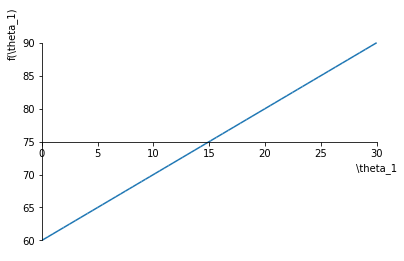

symmetric solution? 7.5*\lambda
---------------
case: 3.75*\lambda + \theta_1 - 0.433012701892219*sqrt(27.0*\lambda**2 + 32.0*\lambda*\theta_1)
---------------


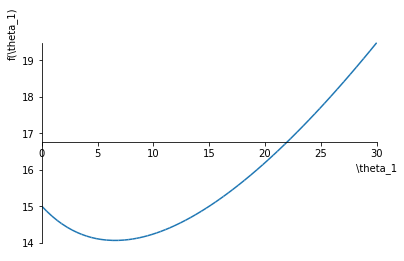

symmetric solution? 5.25*\lambda - 3.75*sqrt(\lambda**2)
---------------
case: 3.75*\lambda + \theta_1 + 0.433012701892219*sqrt(27.0*\lambda**2 + 32.0*\lambda*\theta_1)
---------------


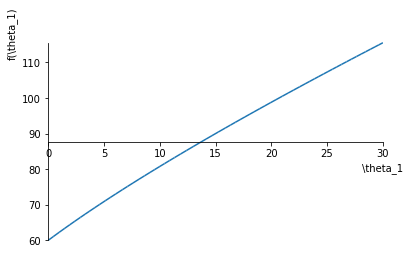

symmetric solution? 5.25*\lambda + 3.75*sqrt(\lambda**2)


In [19]:
foc =  diff(nb_objective(theta2,theta1, .5, .5, lamb), theta2)
mult_sol = simplify(solve(foc,theta2))
outside = 1.5*lamb
for sol in mult_sol:
    print '---------------'
    print 'case: %s\n'%sol,
    print '---------------'
    plot(sol.subs({lamb:10}),(theta1,0,30))
    print 'symmetric solution? %s'%simplify(sol.subs({theta1:1.5*lamb}))

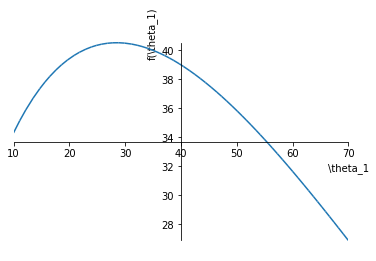

[-0.691367445766578*\lambda, 2.84761744576659*\lambda, 15.0*\lambda]
------
stage1 sol :-0.691367445766578*\lambda 
nb obj 2.95844023135426
response: 3.05863255423342*\lambda - 0.956187913226543*sqrt(\lambda**2) 
-----
stage1 sol :2.84761744576659*\lambda 
nb obj 40.5156000336276
response: 6.59761744576659*\lambda - 4.70618791322654*sqrt(\lambda**2) 
-----
stage1 sol :15.0*\lambda 
nb obj 1.52723471250787e-27
response: 18.75*\lambda - 9.74999999999998*sqrt(\lambda**2) 
-----


In [20]:
foc =  diff(nb_objective(theta2,theta1, .5, .5, lamb), theta2)
mult_sol = solve(foc,theta2)
a = 10
b = 70

h = mult_sol[1]
obj = nb_objective(theta1, simplify(h), .5, .5,lamb)
plot(obj.subs({lamb:a}),(theta1,10,70))


stage1_sol = diff(obj,theta1)
stage1_sol = solve(stage1_sol,theta1)
print stage1_sol
print '------'
for sol in stage1_sol:
    print 'stage1 sol :%s '%sol
    
    response = (h).subs({theta1:sol})
    print 'nb obj %s'%simplify(nb_objective(sol,response,.5,.5,lamb).subs({lamb:10}))
   
    
    #plot(nb_objective(theta2, sol.subs({lamb:a}), .5, .5, a, b),(theta2,a,b))
    print 'response: %s '%response
    print '-----'
    #plot(stage1_sol[0],response,(lamb,a,b))

In [21]:
print t(2.84761744576659*lamb, 6.59761744576659*lamb - 4.70618791322654*lamb, .5, .5, lamb)
print t(6.59761744576659*lamb - 4.70618791322654*lamb, 2.84761744576659*lamb, .5, .5, lamb)

0.420317673897788
0.579682326102211
